In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
import torch
import torchvision
from torchvision import datasets, transforms

import torch.nn as nn
import torch.optim as optim
import copy
from tqdm import tqdm


# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the pixel values to range [-1, 1]
])

# Download the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
# Download the testset
testset = datasets.MNIST('~/.pytorch/MNIST_data', train=False,
                                       download=True, transform=transform)

In [17]:
indices = list(range(len(trainset)))
np.random.shuffle(indices)
shuffled_trainset = torch.utils.data.Subset(trainset, indices)
print(len(shuffled_trainset))

60000


In [18]:
'''dataset1 = []
dataset2 = []
dataset3 = []
dataset4 = []
dataset5 = []
dataset6 = []

for i in range(10000):
    dataset1 = torch.utils.data.Subset(full_dataset, list(range(10000)))
    dataset1.append(shuffled_trainset[i])
    
for i in range(10000, 20000):
    
    dataset2.append(shuffled_trainset[i])
    
for i in range(20000, 30000):
    
    dataset3.append(shuffled_trainset[i])
    
for i in range(30000, 40000):
    
    dataset4.append(shuffled_trainset[i])
    
for i in range(40000, 50000):
    
    dataset5.append(shuffled_trainset[i])
for i in range(50000, 60000):
    
    dataset6.append(shuffled_trainset[i])'''
    
dataset1 = torch.utils.data.Subset(shuffled_trainset, list(range(10000)))
dataset2 = torch.utils.data.Subset(shuffled_trainset, list(range(10000, 20000)))
dataset3 = torch.utils.data.Subset(shuffled_trainset, list(range(20000, 30000)))
dataset4 = torch.utils.data.Subset(shuffled_trainset, list(range(30000, 40000)))
dataset5 = torch.utils.data.Subset(shuffled_trainset, list(range(40000, 50000)))
dataset6 = torch.utils.data.Subset(shuffled_trainset, list(range(50000, 60000)))

In [19]:
batch_size=64
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)
trainloader = torch.utils.data.DataLoader(shuffled_trainset, batch_size=batch_size,
                                         shuffle=False)

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(npimg)
    plt.show()


In [21]:
from torchvision.transforms import v2

def apply_perspective_transform(image):


    mean = torch.mean(image)
    std = torch.std(image)

    perspective_transform = v2.Compose([
        v2.RandomPerspective(distortion_scale=0.3, p=1.0, fill=-1),
        v2.ToDtype(torch.float32, scale=True),
        #v2.Normalize(mean=[mean], std=[std]),
    ])

    transformed_image = perspective_transform(image)
    transformed_image = transformed_image.reshape(28,28)

    return transformed_image

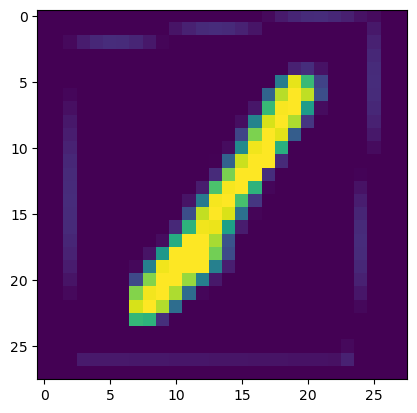

In [22]:
out = apply_perspective_transform(dataset1[0][0])
imshow(out)

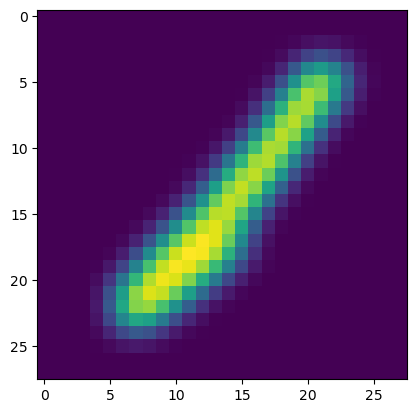

In [23]:
def apply_blur(image):


    blurrer = v2.GaussianBlur(kernel_size=5, sigma=(1, 2.))

    transformed_image = blurrer(image)
    transformed_image = transformed_image.reshape(28,28)

    return transformed_image


out = apply_blur(dataset1[0][0])


imshow(out)

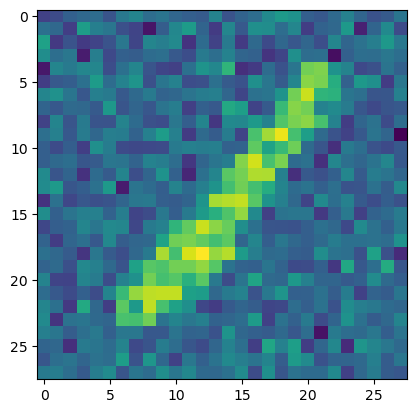

In [24]:
def apply_gaussian_noise(image):

    noise = np.random.normal(scale=0.5,size=(28,28))

    transformed_image = image + noise
    transformed_image = transformed_image.reshape(28,28)

    return transformed_image

out = apply_gaussian_noise(dataset1[0][0])


imshow(out)

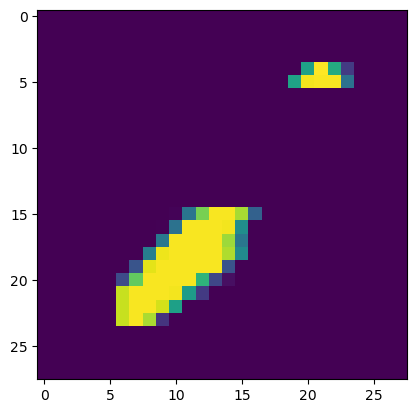

In [25]:
def apply_random_erase(image):


    erase = v2.RandomErasing(value=-1)

    transformed_image = erase(image)
    transformed_image = transformed_image.reshape(28,28)

    return transformed_image

out = apply_random_erase(dataset1[0][0])


imshow(out)

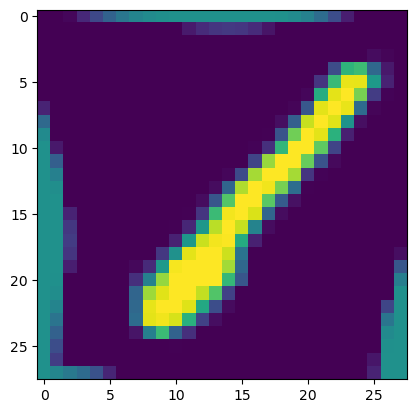

In [26]:
def apply_elastic_transform(image):
    elastic_transformer = v2.ElasticTransform(alpha=50.0)
    transformed_image = elastic_transformer(image)
    transformed_image = transformed_image.reshape(28, 28)
    return transformed_image

out = apply_elastic_transform(dataset1[0][0])
imshow(out)

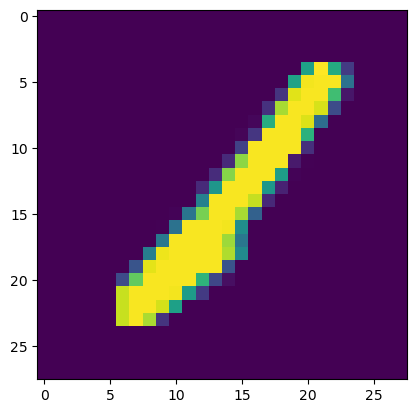

In [27]:
def apply_random_rotation(image):
    rotater = v2.RandomRotation(degrees=(0, 30))
    transformed_image = rotater(image)
    transformed_image = transformed_image.reshape(28, 28)
    return transformed_image

out = apply_random_rotation(dataset1[0][0])
imshow(out)

In [28]:
'''print(len(dataset1))
train_1 = []
for i in range(10000):
    train_1.append([apply_perspective_transform(dataset1[i][0]), dataset1[i][1]])
print(len(train_1))
train_2 = []
for i in range(10000):
    train_2.append(apply_blur(dataset2[i][0]))
train_3 = []
for i in range(10000):
    train_3.append(apply_gaussian_noise(dataset3[i][0]))
train_4 = []
for i in range(10000):
    train_4.append(apply_random_erase(dataset4[i][0]))
train_5 = []
for i in range(10000):
    train_5.append(apply_elastic_transform(dataset5[i][0]))
train_6 = []
for i in range(10000):
    train_6.append(apply_random_rotation(dataset6[i][0]))'''

for i in range(10000):
    dataset1[i][0] == apply_perspective_transform(dataset1[i][0])
for i in range(10000):
    dataset2[i][0] == apply_blur(dataset2[i][0])
for i in range(10000):
    dataset3[i][0] == apply_gaussian_noise(dataset3[i][0])
for i in range(10000):
    dataset4[i][0] == apply_random_erase(dataset4[i][0])
for i in range(10000):
    dataset5[i][0] == apply_elastic_transform(dataset5[i][0])
for i in range(10000):
    dataset6[i][0] == apply_random_rotation(dataset6[i][0])

In [29]:
batch_size=64
trainloaders = []
train_loader_1 = torch.utils.data.DataLoader(dataset1, batch_size=batch_size, shuffle=False)
train_loader_2 = torch.utils.data.DataLoader(dataset2, batch_size=batch_size, shuffle=False)
train_loader_3 = torch.utils.data.DataLoader(dataset3, batch_size=batch_size, shuffle=False)
train_loader_4 = torch.utils.data.DataLoader(dataset4, batch_size=batch_size, shuffle=False)
train_loader_5 = torch.utils.data.DataLoader(dataset5, batch_size=batch_size, shuffle=False)
train_loader_6 = torch.utils.data.DataLoader(dataset6, batch_size=batch_size, shuffle=False)
trainloaders.append(trainloader)
trainloaders.append(train_loader_1)
trainloaders.append(train_loader_2)
trainloaders.append(train_loader_3)
trainloaders.append(train_loader_4)
trainloaders.append(train_loader_5)
trainloaders.append(train_loader_6)

In [30]:
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 2, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(2, 4, kernel_size=3, stride=1, padding=1)
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(4 * 7 * 7, 16)
        self.fc2 = nn.Linear(16, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.max_pool(self.relu(self.conv1(x)))
        x = self.max_pool(self.relu(self.conv2(x)))
        x = x.view(-1, 4 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    

def generate_models():

    models = []
    rand_model = CustomCNN()
    model1 = CustomCNN()
    model2 = CustomCNN()
    model3 = CustomCNN()
    model4 = CustomCNN()
    model5 = CustomCNN()
    model6 = CustomCNN()

    
    models.append(model1)
    models.append(model2)
    models.append(model3)
    models.append(model4)
    models.append(model5)
    models.append(model6)

    initial_rand_parms = copy.deepcopy(rand_model.state_dict())

    return rand_model, models, initial_rand_parms

In [31]:
#initial_rand_parms = copy.deepcopy(model.state_dict())


In [32]:
def gen_optimizers(rand_model, models):
    
        optimizers = []
        rand_optimizer = optim.Adam(rand_model.parameters(), lr=0.001)
        optimizer1 = optim.Adam(models[0].parameters(), lr=0.001)
        optimizer2 = optim.Adam(models[1].parameters(), lr=0.001)
        optimizer3 = optim.Adam(models[2].parameters(), lr=0.001)
        optimizer4 = optim.Adam(models[3].parameters(), lr=0.001)
        optimizer5 = optim.Adam(models[4].parameters(), lr=0.001)
        optimizer6 = optim.Adam(models[5].parameters(), lr=0.001)

        optimizers.append(optimizer1)
        optimizers.append(optimizer2)
        optimizers.append(optimizer3)
        optimizers.append(optimizer4)
        optimizers.append(optimizer5)
        optimizers.append(optimizer6)
    
        return rand_optimizer, optimizers


criterion = nn.CrossEntropyLoss()
# optimizers = []
# optimizer = optim.Adam(model.parameters(), lr=0.001)
# optimizer1 = optim.Adam(model1.parameters(), lr=0.001)
# optimizer2 = optim.Adam(model2.parameters(), lr=0.001)
# optimizer3 = optim.Adam(model3.parameters(), lr=0.001)
# optimizer4 = optim.Adam(model4.parameters(), lr=0.001)
# optimizer5 = optim.Adam(model5.parameters(), lr=0.001)
# optimizer6 = optim.Adam(model6.parameters(), lr=0.001)
# optimizers.append(optimizer)
# optimizers.append(optimizer1)
# optimizers.append(optimizer2)
# optimizers.append(optimizer3)
# optimizers.append(optimizer4)
# optimizers.append(optimizer5)
# optimizers.append(optimizer6)

In [53]:
def train_rand_model(rand_model, rand_optimizer):

    num_epochs = 2
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            
            rand_optimizer.zero_grad()
            
            outputs = rand_model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            rand_optimizer.step()
            
            running_loss += loss.item()
            if i % 100 == 99:  # print every 200 mini-batches
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(trainloader)}], Loss: {running_loss / 200:.4f}')
                running_loss = 0.0
    
    #print('Finished Training')




def train_models(models, optimizers):

    num_epochs = 6
    
    criterion = nn.CrossEntropyLoss()
    for j in tqdm(range(6)):
        for epoch in range(num_epochs):
            running_loss = 0.0
            for i, data in enumerate(trainloaders[j], 0):
                #print(len(data))
                inputs, labels = data
                
                optimizers[j].zero_grad()
                
                outputs = models[j](inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizers[j].step()
                
                running_loss += loss.item()
                if i % 100 == 99:  # print every 200 mini-batches
                    print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(trainloaders[j])}], Loss: {running_loss / 200:.4f}')
                    running_loss = 0.0
        
    #print('Finished Training')

In [34]:
def test_model(model):

    correct = 0
    total = 0

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    #print(f'Accuracy of th randomly initialized network on the 10000 test images: {100 * correct / total:.2f}%')
    return 100 * correct / total


# correct = 0
# total = 0

# with torch.no_grad():
#     for data in testloader:
#         images, labels = data
#         outputs = model(images)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

# print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

In [35]:
# state_dict = model.state_dict()
# for param_tensor in state_dict:
#     print(f"{param_tensor}:\n {state_dict[param_tensor].numpy()}\n")
    
# filters = state_dict["conv2.weight"]
# extracted = []
# for i in range(filters.shape[0]):
#     for j in range(filters.shape[1]):
        

In [36]:
'''from torch.nn import functional as F

# calculate similarity along the rows
print(extracted[0])
tensor1 = extracted[0].unsqueeze(1)
tensor2 = extracted[1].unsqueeze(1)
cosine_similarity_row = F.cosine_similarity(tensor1, tensor2, dim=2)
print(cosine_similarity_row)'''

'''# PAIRWISE SIMILARITY
from sklearn.metrics.pairwise import pairwise_distances
from torch.nn import functional as F

X = extracted[0]
Y = extracted[1]

sim = pairwise_distances(X, Y, metric='cosine')
print(sim)


Xf = extracted[0].view(-1)
Yf = extracted[1].view(-1)

simF = F.cosine_similarity(Xf, Yf, dim=0)
print(simF)'''




"# PAIRWISE SIMILARITY\nfrom sklearn.metrics.pairwise import pairwise_distances\nfrom torch.nn import functional as F\n\nX = extracted[0]\nY = extracted[1]\n\nsim = pairwise_distances(X, Y, metric='cosine')\nprint(sim)\n\n\nXf = extracted[0].view(-1)\nYf = extracted[1].view(-1)\n\nsimF = F.cosine_similarity(Xf, Yf, dim=0)\nprint(simF)"

In [37]:
def calc_overall_sim(tensor1, tensor2):
    
    tensor1_flat = tensor1.view(-1)
    tensor2_flat = tensor2.view(-1)
    
    similarity = F.cosine_similarity(tensor1_flat, tensor2_flat, dim=0)
    similarity = torch.abs(similarity)
    
    return similarity.detach().numpy().reshape(1,)[0]

In [38]:
def calc_pearson_coeff(tensor1, tensor2):
    corr_coeff = np.corrcoef(tensor1.detach().numpy().flatten(), tensor2.detach().numpy().flatten())[0,1]
    corr_coeff = np.abs(corr_coeff)
    return corr_coeff

In [39]:
def calc_frob_norm(tensor1, tensor2):
    A = tensor1.detach().numpy()
    B = tensor2.detach().numpy()
    frobenius_norm = np.linalg.norm(A - B, ord='fro')
    return frobenius_norm

In [40]:
from torch.nn import functional as F
import matplotlib.pyplot as plt
#similarity_scores = np.zeros((6,8))
def compare_filters(models, metrics=['overall_sim', 'pearson_coeff', 'frob_norm']):

    similarity_scores_1 = []
    similarity_scores_2 = []
    similarity_scores_3 = []
    similarity_scores_4 = []
    similarity_scores_5 = []
    similarity_scores_6 = []
    similarity_scores_7 = []
    similarity_scores_8 = []
    similarity_scores_9 = []
    similarity_scores_10 = []

    for i in range(1, 6):

        cnn_filters_i = models[i].conv1.weight
        cnn_filters_i = cnn_filters_i.view(cnn_filters_i.size(0)*cnn_filters_i.size(1), cnn_filters_i.size(2), cnn_filters_i.size(3))   
        for j in range(2):

            filter1 = cnn_filters_i[j]

            for k in range(i+1, 6):
                cnn_filters_k = models[k].conv1.weight
                cnn_filters_k = cnn_filters_k.view(cnn_filters_k.size(0)*cnn_filters_k.size(1), cnn_filters_k.size(2), cnn_filters_k.size(3))
                filter2 = cnn_filters_k[j]
                if metrics == 'overall_sim':
                    similarity = calc_overall_sim(filter1, filter2)
                elif metrics == 'pearson_coeff': 
                    similarity = calc_pearson_coeff(filter1, filter2)
                elif metrics == 'frob_norm':
                    similarity = calc_frob_norm(filter1, filter2)
                #similarity = calc_overall_sim(filter1, filter2)
                #similarity = calc_pearson_coeff(filter1, filter2)
                #similarity = calc_frob_norm(filter1, filter2)

                if j==0:
                    similarity_scores_1.append(similarity)

                if j==1:
                    similarity_scores_2.append(similarity)
            


        cnn_filters = models[i].conv2.weight
        cnn_filters = cnn_filters.view(cnn_filters.size(0)*cnn_filters.size(1), cnn_filters.size(2), cnn_filters.size(3))
        print(cnn_filters.shape)
        
        for j in range(8):
            filter1 = cnn_filters[j]
            
            for k in range(i+1, 6):  # Fix: adjust the range to avoid out-of-bounds indices
                cnn_filters2 = models[k].conv2.weight
                cnn_filters2 = cnn_filters2.view(cnn_filters2.size(0)*cnn_filters2.size(1), cnn_filters2.size(2), cnn_filters2.size(3))
                filter2 = cnn_filters2[j]
                
                if metrics == 'overall_sim':
                    similarity = calc_overall_sim(filter1, filter2)
                elif metrics == 'pearson_coeff':
                    similarity = calc_pearson_coeff(filter1, filter2)
                elif metrics == 'frob_norm':
                    similarity = calc_frob_norm(filter1, filter2)
                #similarity = calc_overall_sim(filter1, filter2)
                #similarity = calc_pearson_coeff(filter1, filter2)
                #similarity = calc_frob_norm(filter1, filter2)
                
                if j==0:
                    similarity_scores_3.append(similarity)
                
                if j==1:
                    similarity_scores_4.append(similarity)
                
                if j==2:
                    similarity_scores_5.append(similarity)
                
                if j==3:
                    similarity_scores_6.append(similarity)
                
                if j==4:
                    similarity_scores_7.append(similarity)
                
                if j==5:
                    similarity_scores_8.append(similarity)
                
                if j==6:
                    similarity_scores_9.append(similarity)
                    
                if j==7:
                    similarity_scores_10.append(similarity)  







    # print(similarity_scores_1)
    # print(similarity_scores_2)
    # print(similarity_scores_3)
    # print(similarity_scores_4)
    # print(similarity_scores_5)
    # print(similarity_scores_6)
    # print(similarity_scores_7)
    # print(similarity_scores_8)
    # print(similarity_scores_9)
    # print(similarity_scores_10)

    return similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10




In [41]:


# filters_1 = []
# filters_2 = []
# filters_3 = []
# filters_4 = []
# filters_5 = []
# filters_6 = []
# filters_7 = []
# filters_8 = []
# filters_9 = []
# filters_10 = []
# for i in range(1,7):
#     cnn_filters = models[i].conv1.weight
#     cnn_filters = cnn_filters.view(cnn_filters.size(0)*cnn_filters.size(1), cnn_filters.size(2), cnn_filters.size(3))
#     for j in range(2):
#         if j==0:
#             filters_1.append(cnn_filters[j].detach().numpy())
#         if j==1:
#             filters_2.append(cnn_filters[j].detach().numpy())
#     cnn_filters = models[i].conv2.weight
#     cnn_filters = cnn_filters.view(cnn_filters.size(0)*cnn_filters.size(1), cnn_filters.size(2), cnn_filters.size(3))

#     for j in range(8):
#         if j==0:
#             filters_3.append(cnn_filters[j].detach().numpy())
#         if j==1:
#             filters_4.append(cnn_filters[j].detach().numpy())
#         if j==2:
#             filters_5.append(cnn_filters[j].detach().numpy())
#         if j==3:
#             filters_6.append(cnn_filters[j].detach().numpy())
#         if j==4:
#             filters_7.append(cnn_filters[j].detach().numpy())
#         if j==5:
#             filters_8.append(cnn_filters[j].detach().numpy())
#         if j==6:
#             filters_9.append(cnn_filters[j].detach().numpy())  
#         if j==7:   
#             filters_10.append(cnn_filters[j].detach().numpy())
            
# matrices = np.array(filters_1)
# variance_matrix = np.var(matrices, axis=0)   
# print(variance_matrix)

In [42]:


def get_max_index(similarity_scores):
    max_index = np.argmax(similarity_scores)
    return max_index

def get_max_index(similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10):

    filter1_idx = np.argmax(similarity_scores_1)
    filter2_idx = np.argmax(similarity_scores_2)
    filter3_idx = np.argmax(similarity_scores_3)
    filter4_idx = np.argmax(similarity_scores_4)
    filter5_idx = np.argmax(similarity_scores_5)
    filter6_idx = np.argmax(similarity_scores_6)
    filter7_idx = np.argmax(similarity_scores_7)
    filter8_idx = np.argmax(similarity_scores_8)
    filter9_idx = np.argmax(similarity_scores_9)
    filter10_idx = np.argmax(similarity_scores_10)

    indexes = [filter1_idx, filter2_idx, filter3_idx, filter4_idx, filter5_idx, filter6_idx, filter7_idx, filter8_idx, filter9_idx, filter10_idx]


    # print("Filter 1 index:", filter1_idx)
    # print("Filter 2 index:", filter2_idx)
    # print("Filter 3 index:", filter3_idx)
    # print("Filter 4 index:", filter4_idx)
    # print("Filter 5 index:", filter5_idx)
    # print("Filter 6 index:", filter6_idx)
    # print("Filter 7 index:", filter7_idx)
    # print("Filter 8 index:", filter8_idx)
    # print("Filter 9 index:", filter9_idx)
    # print("Filter 10 index:", filter10_idx)

    return indexes



#(1,2) (1,3) (1,4) (1,5) (1,6) (2,3) (2,4) (2,5) (2,6)  (3,4) (3,5) (3,6) (4,5) (4,6) (5,6)


#with torch.no_grad():
 #   net.conv1.weight[1][1] = torch.zeros((3, 3))

In [43]:
# Hand coding in the filters

def select_filters(models, indexes):
    selected_filters = []

    for i, idx in enumerate(indexes):
        if idx in range(0,5):
            if i == 0 or i == 1:
                selected_filters.append(models[1].conv1.weight[i])
            else:
                selected_filters.append(models[1].conv2.weight[(i//2)-1][i%2])

        if idx in range(5,9):
            if i == 0 or i == 1:
                selected_filters.append(models[2].conv1.weight[i])
            else:
                selected_filters.append(models[2].conv2.weight[(i//2)-1][i%2])
        if idx in range(9,12):
            if i == 0 or i == 1:
                selected_filters.append(models[3].conv1.weight[i])
            else:
                selected_filters.append(models[3].conv2.weight[(i//2)-1][i%2])
        if idx in range(12,14):
            if i == 0 or i == 1:
                selected_filters.append(models[4].conv1.weight[i])
            else:
                selected_filters.append(models[4].conv2.weight[(i//2)-1][i%2])
        if idx in range(14,15):
            if i == 0 or i == 1:
                selected_filters.append(models[5].conv1.weight[i])
            else:
                selected_filters.append(models[5].conv2.weight[(i//2)-1][i%2])

    return selected_filters

# selected_filters = []

# for i, idx in enumerate(indexes):
#     if idx in range(0,5):
#         if i == 0 or i == 1:
#             selected_filters.append(model1.conv1.weight[i])
#         else:
#             selected_filters.append(model1.conv2.weight[(i//2)-1][i%2])

#     if idx in range(5,9):
#         if i == 0 or i == 1:
#             selected_filters.append(model2.conv1.weight[i])
#         else:
#             selected_filters.append(model2.conv2.weight[(i//2)-1][i%2])
#     if idx in range(9,12):
#         if i == 0 or i == 1:
#             selected_filters.append(model3.conv1.weight[i])
#         else:
#             selected_filters.append(model3.conv2.weight[(i//2)-1][i%2])
#     if idx in range(12,14):
#         if i == 0 or i == 1:
#             selected_filters.append(model4.conv1.weight[i])
#         else:
#             selected_filters.append(model4.conv2.weight[(i//2)-1][i%2])
#     if idx in range(14,15):
#         if i == 0 or i == 1:
#             selected_filters.append(model5.conv1.weight[i])
#         else:
#             selected_filters.append(model5.conv2.weight[(i//2)-1][i%2])
    
        
        


In [44]:
# Warm starting a model with the selected filters
from torchsummary import summary


def gen_warm_start_model():

    model_warm_start = CustomCNN()
    summary(model_warm_start, (1, 28,28))

    with torch.no_grad():
        model_warm_start.conv1.weight[0] = selected_filters[0]
        model_warm_start.conv1.weight[1] = selected_filters[1]
        model_warm_start.conv2.weight[0][0] = selected_filters[2]
        model_warm_start.conv2.weight[0][1] = selected_filters[3]
        model_warm_start.conv2.weight[1][0] = selected_filters[4]
        model_warm_start.conv2.weight[1][1] = selected_filters[5]
        model_warm_start.conv2.weight[2][0] = selected_filters[6]
        model_warm_start.conv2.weight[2][1] = selected_filters[7]
        model_warm_start.conv2.weight[3][0] = selected_filters[8]
        model_warm_start.conv2.weight[3][1] = selected_filters[9]

    model_warm_start.requires_grad = True
    torch.enable_grad

    return model_warm_start



In [45]:


def train_warm_start_model(model_warm_start):
    num_epochs = 1

    optimizer_warm= optim.Adam(model_warm_start.parameters(), lr=0.001)


    initial_params = copy.deepcopy(model_warm_start.state_dict())
    print(initial_params.keys())

    with torch.enable_grad():

        for epoch in range(num_epochs):
            running_loss = 0.0
            for i, data in enumerate(trainloaders[0], 0):
                #print(len(data))
                inputs, labels = data
                
                optimizer_warm.zero_grad()
                
                outputs = model_warm_start(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer_warm.step()
                
                running_loss += loss.item()
                if i % 100 == 99:  # print every 200 mini-batches
                    print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(trainloaders[0])}], Loss: {running_loss / 200:.4f}')
                    running_loss = 0.0
        
    # print('Finished Training')

    print(model_warm_start.conv1.weight)
    final_params = model_warm_start.state_dict()

    return initial_params, final_params


In [46]:
def test_warm_start_model(model_warm_start):
    correct = 0
    total = 0

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model_warm_start(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # print(f'Accuracy of the warm started network on the 10000 test images: {100 * correct / total:.2f}%')

    return 100 * correct / total

# correct = 0
# total = 0

# with torch.no_grad():
#     for data in testloader:
#         images, labels = data
#         outputs = model_warm_start(images)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

# print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

In [47]:


cosine_similarities = []
cosine_rand_accuracies = []
cosine_warm_accuracies = []
cos_list_of_indexes = []

for i in range(10):

    rand_model, cos_models, _ = generate_models()
    #cos_models = cos_models[0]
    rand_optimizer, cos_optimizers = gen_optimizers(rand_model, cos_models)
    print(cos_optimizers[0])


    train_models(cos_models, cos_optimizers)
    train_rand_model(rand_model, rand_optimizer)
    similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10 = compare_filters(cos_models, metrics='overall_sim')
    indexes = get_max_index(similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10)
    cos_list_of_indexes.append(indexes)
    selected_filters = select_filters(cos_models, indexes)
    model_warm_start = gen_warm_start_model()
    initial_params, final_params = train_warm_start_model(model_warm_start)
    accuracy = test_warm_start_model(model_warm_start)
    rand_accuracy = test_model(rand_model)

    cosine_similarities.append([similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10])
    cosine_rand_accuracies.append(rand_accuracy)
    cosine_warm_accuracies.append(accuracy)




pearson_similarities = []
pearson_rand_accuracies = []
pearson_warm_accuracies = []
pear_list_of_indexes = []

for i in range(10):

    pear_models = generate_models()
    pear_models = pear_models[0]
    pear_optimizers = gen_optimizers(pear_models)
    print(pear_optimizers[0])
    
    train_models(pear_models, pear_optimizers)
    similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10 = compare_filters(pear_models, metrics='pearson_coeff')
    indexes = get_max_index(similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10)
    pear_list_of_indexes.append(indexes)
    selected_filters = select_filters(pear_models, indexes)
    model_warm_start = gen_warm_start_model()
    initial_params, final_params = train_warm_start_model(model_warm_start)
    accuracy = test_warm_start_model(model_warm_start)
    #rand_accuracy = test_model(pear_models[0])

    pearson_similarities.append([similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10])
    #pearson_rand_accuracies.append(rand_accuracy)
    pearson_warm_accuracies.append(accuracy)



frob_norm_similarities = []
frob_norm_rand_accuracies = []
frob_norm_warm_accuracies = []
frob_list_of_indexes = []

for i in range(10):

    frob_models = generate_models()
    frob_models = frob_models[0]
    frob_optimizers = gen_optimizers(frob_models)
    print(frob_optimizers[0])
        
    train_models(frob_models, frob_optimizers)
    similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10 = compare_filters(frob_models, metrics='frob_norm')
    indexes = get_max_index(similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10)
    frob_list_of_indexes.append(indexes)
    selected_filters = select_filters(frob_models, indexes)
    model_warm_start = gen_warm_start_model()
    initial_params, final_params = train_warm_start_model(model_warm_start)
    accuracy = test_warm_start_model(model_warm_start)
    #rand_accuracy = test_model(frob_models[0])

    frob_norm_similarities.append([similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10])
    #frob_norm_rand_accuracies.append(rand_accuracy)
    frob_norm_warm_accuracies.append(accuracy)






Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch [1/6], Step [100/938], Loss: 1.1027
Epoch [1/6], Step [200/938], Loss: 0.6698
Epoch [1/6], Step [300/938], Loss: 0.4043
Epoch [1/6], Step [400/938], Loss: 0.3055
Epoch [1/6], Step [500/938], Loss: 0.2491
Epoch [1/6], Step [600/938], Loss: 0.2171
Epoch [1/6], Step [700/938], Loss: 0.2065
Epoch [1/6], Step [800/938], Loss: 0.1993
Epoch [1/6], Step [900/938], Loss: 0.1879
Epoch [2/6], Step [100/938], Loss: 0.1611
Epoch [2/6], Step [200/938], Loss: 0.1557
Epoch [2/6], Step [300/938], Loss: 0.1605
Epoch [2/6], Step [400/938], Loss: 0.1452
Epoch [2/6], Step [500/938], Loss: 0.1326
Epoch [2/6], Step [600/938], Loss: 0.1285
Epoch [2/6], Step [700/938], Loss: 0.1250
Epoch [2/6], Step [800/938], Loss: 0.1278
Epoch [2/6], Step [900/938], Loss: 0.1210
Epoch [3/6], Step [100/938], Loss: 0.1081
Epoch [3/6], Step [200/938], Loss: 0.1046
Epoch [3/6], Step [300/938], Loss: 0.1140
Epoch [3/6], Step [400/938], Loss: 0.1080
Epoch [3/6], Step [500/938], Loss: 0.0995
Epoch [3/6], Step [600/938], Loss:

 17%|█▋        | 1/6 [01:13<06:09, 73.89s/it]

Epoch [1/6], Step [100/157], Loss: 1.0647
Epoch [2/6], Step [100/157], Loss: 0.4103
Epoch [3/6], Step [100/157], Loss: 0.2614
Epoch [4/6], Step [100/157], Loss: 0.2089
Epoch [5/6], Step [100/157], Loss: 0.1783
Epoch [6/6], Step [100/157], Loss: 0.1567


 33%|███▎      | 2/6 [01:26<02:30, 37.66s/it]

Epoch [1/6], Step [100/157], Loss: 0.9801
Epoch [2/6], Step [100/157], Loss: 0.3292
Epoch [3/6], Step [100/157], Loss: 0.2377
Epoch [4/6], Step [100/157], Loss: 0.2027
Epoch [5/6], Step [100/157], Loss: 0.1820
Epoch [6/6], Step [100/157], Loss: 0.1673


 50%|█████     | 3/6 [01:41<01:22, 27.48s/it]

Epoch [1/6], Step [100/157], Loss: 1.0996
Epoch [2/6], Step [100/157], Loss: 0.4114
Epoch [3/6], Step [100/157], Loss: 0.2648
Epoch [4/6], Step [100/157], Loss: 0.2185
Epoch [5/6], Step [100/157], Loss: 0.1914
Epoch [6/6], Step [100/157], Loss: 0.1728


 67%|██████▋   | 4/6 [01:56<00:45, 22.63s/it]

Epoch [1/6], Step [100/157], Loss: 1.0330
Epoch [2/6], Step [100/157], Loss: 0.3037
Epoch [3/6], Step [100/157], Loss: 0.2130
Epoch [4/6], Step [100/157], Loss: 0.1778
Epoch [5/6], Step [100/157], Loss: 0.1533
Epoch [6/6], Step [100/157], Loss: 0.1344


 83%|████████▎ | 5/6 [02:07<00:18, 18.39s/it]

Epoch [1/6], Step [100/157], Loss: 1.0516
Epoch [2/6], Step [100/157], Loss: 0.3259
Epoch [3/6], Step [100/157], Loss: 0.2061
Epoch [4/6], Step [100/157], Loss: 0.1681
Epoch [5/6], Step [100/157], Loss: 0.1443
Epoch [6/6], Step [100/157], Loss: 0.1267


100%|██████████| 6/6 [02:15<00:00, 22.54s/it]


Epoch [1/1], Step [100/938], Loss: 0.9888
Epoch [1/1], Step [200/938], Loss: 0.4480
Epoch [1/1], Step [300/938], Loss: 0.3170
Epoch [1/1], Step [400/938], Loss: 0.2471
Epoch [1/1], Step [500/938], Loss: 0.2225
Epoch [1/1], Step [600/938], Loss: 0.2023
Epoch [1/1], Step [700/938], Loss: 0.1991
Epoch [1/1], Step [800/938], Loss: 0.1920
Epoch [1/1], Step [900/938], Loss: 0.1799
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch [1/6], Step [100/938], Loss: 1.1448
Epoch [1/6], Step [200/938], Loss: 1.0087
Epoch [1/6], Step [300/938], Loss: 0.6498
Epoch [1/6], Step [400/938], Loss: 0.4125
Epoch [1/6], Step [500/938], Loss: 0.3329
Epoch [1/6], Step [600/938], Loss: 0.2942
Epoch [1/6], Step [700/938], Loss: 0.2740
Epoch [1/6], Step [800/938], Loss: 0.2674
Epoch [1/6], Step [900/938], Loss: 0.2435
Epoch [2/6], Step [100/938], Loss: 0.2266
Epoch [2/6], Step [200/938], Loss: 0.2209
Epoch [2/6], Step [300/938], Loss: 0.2232
Epoch [2/6], Step [400/938], Loss: 0.1965
Epoch [2/6], Step [500/938], Loss: 0.1920
Epoch [2/6], Step [600/938], Loss: 0.1869
Epoch [2/6], Step [700/938], Loss: 0.1904
Epoch [2/6], Step [800/938], Loss: 0.1872
Epoch [2/6], Step [900/938], Loss: 0.1801
Epoch [3/6], Step [100/938], Loss: 0.1735
Epoch [3/6], Step [200/938], Loss: 0.1717
Epoch [3/6], Step [300/938], Loss: 0.1800
Epoch [3/6], Step [400/938], Loss: 0.1580
Epoch [3/6], Step [500/938], Loss: 0.1561
Epoch [3/6], Step [600/938], Loss:

 17%|█▋        | 1/6 [01:14<06:10, 74.16s/it]

Epoch [1/6], Step [100/157], Loss: 1.0466
Epoch [2/6], Step [100/157], Loss: 0.3240
Epoch [3/6], Step [100/157], Loss: 0.2131
Epoch [4/6], Step [100/157], Loss: 0.1753
Epoch [5/6], Step [100/157], Loss: 0.1536
Epoch [6/6], Step [100/157], Loss: 0.1384


 33%|███▎      | 2/6 [01:29<02:37, 39.33s/it]

Epoch [1/6], Step [100/157], Loss: 0.8953
Epoch [2/6], Step [100/157], Loss: 0.2712
Epoch [3/6], Step [100/157], Loss: 0.1937
Epoch [4/6], Step [100/157], Loss: 0.1599
Epoch [5/6], Step [100/157], Loss: 0.1380
Epoch [6/6], Step [100/157], Loss: 0.1222


 50%|█████     | 3/6 [01:44<01:25, 28.36s/it]

Epoch [1/6], Step [100/157], Loss: 1.0038
Epoch [2/6], Step [100/157], Loss: 0.3091
Epoch [3/6], Step [100/157], Loss: 0.2181
Epoch [4/6], Step [100/157], Loss: 0.1804
Epoch [5/6], Step [100/157], Loss: 0.1536
Epoch [6/6], Step [100/157], Loss: 0.1309


 67%|██████▋   | 4/6 [01:59<00:46, 23.25s/it]

Epoch [1/6], Step [100/157], Loss: 0.9727
Epoch [2/6], Step [100/157], Loss: 0.2874
Epoch [3/6], Step [100/157], Loss: 0.2043
Epoch [4/6], Step [100/157], Loss: 0.1653
Epoch [5/6], Step [100/157], Loss: 0.1388
Epoch [6/6], Step [100/157], Loss: 0.1202


 83%|████████▎ | 5/6 [02:15<00:20, 20.42s/it]

Epoch [1/6], Step [100/157], Loss: 1.1167
Epoch [2/6], Step [100/157], Loss: 0.4318
Epoch [3/6], Step [100/157], Loss: 0.2177
Epoch [4/6], Step [100/157], Loss: 0.1627
Epoch [5/6], Step [100/157], Loss: 0.1352
Epoch [6/6], Step [100/157], Loss: 0.1181


100%|██████████| 6/6 [02:30<00:00, 25.11s/it]


Epoch [1/1], Step [100/938], Loss: 1.0442
Epoch [1/1], Step [200/938], Loss: 0.4424
Epoch [1/1], Step [300/938], Loss: 0.2170
Epoch [1/1], Step [400/938], Loss: 0.1587
Epoch [1/1], Step [500/938], Loss: 0.1333
Epoch [1/1], Step [600/938], Loss: 0.1184
Epoch [1/1], Step [700/938], Loss: 0.1127
Epoch [1/1], Step [800/938], Loss: 0.1106
Epoch [1/1], Step [900/938], Loss: 0.1004
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch [1/6], Step [100/938], Loss: 1.0887
Epoch [1/6], Step [200/938], Loss: 0.5051
Epoch [1/6], Step [300/938], Loss: 0.2421
Epoch [1/6], Step [400/938], Loss: 0.1733
Epoch [1/6], Step [500/938], Loss: 0.1446
Epoch [1/6], Step [600/938], Loss: 0.1288
Epoch [1/6], Step [700/938], Loss: 0.1216
Epoch [1/6], Step [800/938], Loss: 0.1184
Epoch [1/6], Step [900/938], Loss: 0.1152
Epoch [2/6], Step [100/938], Loss: 0.0969
Epoch [2/6], Step [200/938], Loss: 0.1007
Epoch [2/6], Step [300/938], Loss: 0.0987
Epoch [2/6], Step [400/938], Loss: 0.0907
Epoch [2/6], Step [500/938], Loss: 0.0812
Epoch [2/6], Step [600/938], Loss: 0.0825
Epoch [2/6], Step [700/938], Loss: 0.0798
Epoch [2/6], Step [800/938], Loss: 0.0820
Epoch [2/6], Step [900/938], Loss: 0.0826
Epoch [3/6], Step [100/938], Loss: 0.0722
Epoch [3/6], Step [200/938], Loss: 0.0769
Epoch [3/6], Step [300/938], Loss: 0.0782
Epoch [3/6], Step [400/938], Loss: 0.0761
Epoch [3/6], Step [500/938], Loss: 0.0655
Epoch [3/6], Step [600/938], Loss:

 17%|█▋        | 1/6 [00:49<04:06, 49.30s/it]

Epoch [1/6], Step [100/157], Loss: 1.1304
Epoch [2/6], Step [100/157], Loss: 0.6202
Epoch [3/6], Step [100/157], Loss: 0.3737
Epoch [4/6], Step [100/157], Loss: 0.3157
Epoch [5/6], Step [100/157], Loss: 0.2843
Epoch [6/6], Step [100/157], Loss: 0.2616


 33%|███▎      | 2/6 [00:57<01:39, 24.92s/it]

Epoch [1/6], Step [100/157], Loss: 1.0312
Epoch [2/6], Step [100/157], Loss: 0.2910
Epoch [3/6], Step [100/157], Loss: 0.1973
Epoch [4/6], Step [100/157], Loss: 0.1628
Epoch [5/6], Step [100/157], Loss: 0.1423
Epoch [6/6], Step [100/157], Loss: 0.1280


 50%|█████     | 3/6 [01:05<00:52, 17.35s/it]

Epoch [1/6], Step [100/157], Loss: 1.0581
Epoch [2/6], Step [100/157], Loss: 0.2786
Epoch [3/6], Step [100/157], Loss: 0.2070
Epoch [4/6], Step [100/157], Loss: 0.1789
Epoch [5/6], Step [100/157], Loss: 0.1607
Epoch [6/6], Step [100/157], Loss: 0.1470


 67%|██████▋   | 4/6 [01:12<00:26, 13.34s/it]

Epoch [1/6], Step [100/157], Loss: 1.0243
Epoch [2/6], Step [100/157], Loss: 0.3350
Epoch [3/6], Step [100/157], Loss: 0.2414
Epoch [4/6], Step [100/157], Loss: 0.2066
Epoch [5/6], Step [100/157], Loss: 0.1845
Epoch [6/6], Step [100/157], Loss: 0.1684


 83%|████████▎ | 5/6 [01:20<00:11, 11.17s/it]

Epoch [1/6], Step [100/157], Loss: 1.1302
Epoch [2/6], Step [100/157], Loss: 0.4454
Epoch [3/6], Step [100/157], Loss: 0.2691
Epoch [4/6], Step [100/157], Loss: 0.2176
Epoch [5/6], Step [100/157], Loss: 0.1886
Epoch [6/6], Step [100/157], Loss: 0.1692


100%|██████████| 6/6 [01:27<00:00, 14.59s/it]


Epoch [1/1], Step [100/938], Loss: 1.0241
Epoch [1/1], Step [200/938], Loss: 0.4240
Epoch [1/1], Step [300/938], Loss: 0.2654
Epoch [1/1], Step [400/938], Loss: 0.2097
Epoch [1/1], Step [500/938], Loss: 0.1800
Epoch [1/1], Step [600/938], Loss: 0.1621
Epoch [1/1], Step [700/938], Loss: 0.1545
Epoch [1/1], Step [800/938], Loss: 0.1487
Epoch [1/1], Step [900/938], Loss: 0.1313
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch [1/6], Step [100/938], Loss: 0.9770
Epoch [1/6], Step [200/938], Loss: 0.3744
Epoch [1/6], Step [300/938], Loss: 0.2659
Epoch [1/6], Step [400/938], Loss: 0.2129
Epoch [1/6], Step [500/938], Loss: 0.1867
Epoch [1/6], Step [600/938], Loss: 0.1703
Epoch [1/6], Step [700/938], Loss: 0.1705
Epoch [1/6], Step [800/938], Loss: 0.1689
Epoch [1/6], Step [900/938], Loss: 0.1541
Epoch [2/6], Step [100/938], Loss: 0.1377
Epoch [2/6], Step [200/938], Loss: 0.1308
Epoch [2/6], Step [300/938], Loss: 0.1309
Epoch [2/6], Step [400/938], Loss: 0.1151
Epoch [2/6], Step [500/938], Loss: 0.1026
Epoch [2/6], Step [600/938], Loss: 0.1024
Epoch [2/6], Step [700/938], Loss: 0.1011
Epoch [2/6], Step [800/938], Loss: 0.1042
Epoch [2/6], Step [900/938], Loss: 0.0960
Epoch [3/6], Step [100/938], Loss: 0.0905
Epoch [3/6], Step [200/938], Loss: 0.0906
Epoch [3/6], Step [300/938], Loss: 0.0914
Epoch [3/6], Step [400/938], Loss: 0.0829
Epoch [3/6], Step [500/938], Loss: 0.0739
Epoch [3/6], Step [600/938], Loss:

 17%|█▋        | 1/6 [01:03<05:19, 63.82s/it]

Epoch [1/6], Step [100/157], Loss: 1.0801
Epoch [2/6], Step [100/157], Loss: 0.3034
Epoch [3/6], Step [100/157], Loss: 0.1902
Epoch [4/6], Step [100/157], Loss: 0.1486
Epoch [5/6], Step [100/157], Loss: 0.1256
Epoch [6/6], Step [100/157], Loss: 0.1102


 33%|███▎      | 2/6 [01:15<02:11, 32.92s/it]

Epoch [1/6], Step [100/157], Loss: 1.1065
Epoch [2/6], Step [100/157], Loss: 0.4310
Epoch [3/6], Step [100/157], Loss: 0.2678
Epoch [4/6], Step [100/157], Loss: 0.2204
Epoch [5/6], Step [100/157], Loss: 0.1930
Epoch [6/6], Step [100/157], Loss: 0.1751


 50%|█████     | 3/6 [01:25<01:07, 22.45s/it]

Epoch [1/6], Step [100/157], Loss: 0.9400
Epoch [2/6], Step [100/157], Loss: 0.2970
Epoch [3/6], Step [100/157], Loss: 0.2170
Epoch [4/6], Step [100/157], Loss: 0.1879
Epoch [5/6], Step [100/157], Loss: 0.1694
Epoch [6/6], Step [100/157], Loss: 0.1549


 67%|██████▋   | 4/6 [01:32<00:33, 16.69s/it]

Epoch [1/6], Step [100/157], Loss: 1.0085
Epoch [2/6], Step [100/157], Loss: 0.3316
Epoch [3/6], Step [100/157], Loss: 0.2094
Epoch [4/6], Step [100/157], Loss: 0.1691
Epoch [5/6], Step [100/157], Loss: 0.1472
Epoch [6/6], Step [100/157], Loss: 0.1329


 83%|████████▎ | 5/6 [01:45<00:15, 15.13s/it]

Epoch [1/6], Step [100/157], Loss: 1.1098
Epoch [2/6], Step [100/157], Loss: 0.3882
Epoch [3/6], Step [100/157], Loss: 0.1947
Epoch [4/6], Step [100/157], Loss: 0.1440
Epoch [5/6], Step [100/157], Loss: 0.1218
Epoch [6/6], Step [100/157], Loss: 0.1084


100%|██████████| 6/6 [01:57<00:00, 19.64s/it]


Epoch [1/1], Step [100/938], Loss: 1.0501
Epoch [1/1], Step [200/938], Loss: 0.4958
Epoch [1/1], Step [300/938], Loss: 0.2982
Epoch [1/1], Step [400/938], Loss: 0.2304
Epoch [1/1], Step [500/938], Loss: 0.1932
Epoch [1/1], Step [600/938], Loss: 0.1696
Epoch [1/1], Step [700/938], Loss: 0.1651
Epoch [1/1], Step [800/938], Loss: 0.1497
Epoch [1/1], Step [900/938], Loss: 0.1388
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch [1/6], Step [100/938], Loss: 1.0015
Epoch [1/6], Step [200/938], Loss: 0.4420
Epoch [1/6], Step [300/938], Loss: 0.2755
Epoch [1/6], Step [400/938], Loss: 0.2124
Epoch [1/6], Step [500/938], Loss: 0.1754
Epoch [1/6], Step [600/938], Loss: 0.1626
Epoch [1/6], Step [700/938], Loss: 0.1581
Epoch [1/6], Step [800/938], Loss: 0.1470
Epoch [1/6], Step [900/938], Loss: 0.1374
Epoch [2/6], Step [100/938], Loss: 0.1255
Epoch [2/6], Step [200/938], Loss: 0.1190
Epoch [2/6], Step [300/938], Loss: 0.1204
Epoch [2/6], Step [400/938], Loss: 0.1095
Epoch [2/6], Step [500/938], Loss: 0.0936
Epoch [2/6], Step [600/938], Loss: 0.0963
Epoch [2/6], Step [700/938], Loss: 0.0975
Epoch [2/6], Step [800/938], Loss: 0.0943
Epoch [2/6], Step [900/938], Loss: 0.0906
Epoch [3/6], Step [100/938], Loss: 0.0865
Epoch [3/6], Step [200/938], Loss: 0.0855
Epoch [3/6], Step [300/938], Loss: 0.0889
Epoch [3/6], Step [400/938], Loss: 0.0834
Epoch [3/6], Step [500/938], Loss: 0.0708
Epoch [3/6], Step [600/938], Loss:

 17%|█▋        | 1/6 [01:23<06:55, 83.06s/it]

Epoch [1/6], Step [100/157], Loss: 0.9748
Epoch [2/6], Step [100/157], Loss: 0.3220
Epoch [3/6], Step [100/157], Loss: 0.2298
Epoch [4/6], Step [100/157], Loss: 0.1911
Epoch [5/6], Step [100/157], Loss: 0.1673
Epoch [6/6], Step [100/157], Loss: 0.1497


 33%|███▎      | 2/6 [01:38<02:53, 43.48s/it]

Epoch [1/6], Step [100/157], Loss: 1.0277
Epoch [2/6], Step [100/157], Loss: 0.3645
Epoch [3/6], Step [100/157], Loss: 0.2397
Epoch [4/6], Step [100/157], Loss: 0.1937
Epoch [5/6], Step [100/157], Loss: 0.1697
Epoch [6/6], Step [100/157], Loss: 0.1537


 50%|█████     | 3/6 [01:49<01:24, 28.30s/it]

Epoch [1/6], Step [100/157], Loss: 1.0404
Epoch [2/6], Step [100/157], Loss: 0.3265
Epoch [3/6], Step [100/157], Loss: 0.2035
Epoch [4/6], Step [100/157], Loss: 0.1620
Epoch [5/6], Step [100/157], Loss: 0.1371
Epoch [6/6], Step [100/157], Loss: 0.1201


 67%|██████▋   | 4/6 [01:56<00:39, 19.87s/it]

Epoch [1/6], Step [100/157], Loss: 0.9861
Epoch [2/6], Step [100/157], Loss: 0.2738
Epoch [3/6], Step [100/157], Loss: 0.1810
Epoch [4/6], Step [100/157], Loss: 0.1485
Epoch [5/6], Step [100/157], Loss: 0.1297
Epoch [6/6], Step [100/157], Loss: 0.1163


 83%|████████▎ | 5/6 [02:13<00:19, 19.05s/it]

Epoch [1/6], Step [100/157], Loss: 1.0184
Epoch [2/6], Step [100/157], Loss: 0.3033
Epoch [3/6], Step [100/157], Loss: 0.2007
Epoch [4/6], Step [100/157], Loss: 0.1607
Epoch [5/6], Step [100/157], Loss: 0.1381
Epoch [6/6], Step [100/157], Loss: 0.1228


100%|██████████| 6/6 [02:29<00:00, 24.85s/it]


Epoch [1/1], Step [100/938], Loss: 1.0572
Epoch [1/1], Step [200/938], Loss: 0.5156
Epoch [1/1], Step [300/938], Loss: 0.3220
Epoch [1/1], Step [400/938], Loss: 0.2490
Epoch [1/1], Step [500/938], Loss: 0.2162
Epoch [1/1], Step [600/938], Loss: 0.1982
Epoch [1/1], Step [700/938], Loss: 0.1915
Epoch [1/1], Step [800/938], Loss: 0.1910
Epoch [1/1], Step [900/938], Loss: 0.1737
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch [1/6], Step [100/938], Loss: 1.0955
Epoch [1/6], Step [200/938], Loss: 0.5853
Epoch [1/6], Step [300/938], Loss: 0.3859
Epoch [1/6], Step [400/938], Loss: 0.2907
Epoch [1/6], Step [500/938], Loss: 0.2413
Epoch [1/6], Step [600/938], Loss: 0.2182
Epoch [1/6], Step [700/938], Loss: 0.2045
Epoch [1/6], Step [800/938], Loss: 0.1997
Epoch [1/6], Step [900/938], Loss: 0.1849
Epoch [2/6], Step [100/938], Loss: 0.1607
Epoch [2/6], Step [200/938], Loss: 0.1574
Epoch [2/6], Step [300/938], Loss: 0.1604
Epoch [2/6], Step [400/938], Loss: 0.1425
Epoch [2/6], Step [500/938], Loss: 0.1229
Epoch [2/6], Step [600/938], Loss: 0.1245
Epoch [2/6], Step [700/938], Loss: 0.1188
Epoch [2/6], Step [800/938], Loss: 0.1220
Epoch [2/6], Step [900/938], Loss: 0.1182
Epoch [3/6], Step [100/938], Loss: 0.1048
Epoch [3/6], Step [200/938], Loss: 0.1038
Epoch [3/6], Step [300/938], Loss: 0.1066
Epoch [3/6], Step [400/938], Loss: 0.0999
Epoch [3/6], Step [500/938], Loss: 0.0845
Epoch [3/6], Step [600/938], Loss:

 17%|█▋        | 1/6 [01:26<07:12, 86.42s/it]

Epoch [1/6], Step [100/157], Loss: 1.0095
Epoch [2/6], Step [100/157], Loss: 0.3029
Epoch [3/6], Step [100/157], Loss: 0.2141
Epoch [4/6], Step [100/157], Loss: 0.1806
Epoch [5/6], Step [100/157], Loss: 0.1591
Epoch [6/6], Step [100/157], Loss: 0.1434


 33%|███▎      | 2/6 [01:33<02:39, 39.79s/it]

Epoch [1/6], Step [100/157], Loss: 1.0200
Epoch [2/6], Step [100/157], Loss: 0.3317
Epoch [3/6], Step [100/157], Loss: 0.2172
Epoch [4/6], Step [100/157], Loss: 0.1742
Epoch [5/6], Step [100/157], Loss: 0.1487
Epoch [6/6], Step [100/157], Loss: 0.1305


 50%|█████     | 3/6 [01:41<01:15, 25.11s/it]

Epoch [1/6], Step [100/157], Loss: 1.0270
Epoch [2/6], Step [100/157], Loss: 0.3120
Epoch [3/6], Step [100/157], Loss: 0.2199
Epoch [4/6], Step [100/157], Loss: 0.1824
Epoch [5/6], Step [100/157], Loss: 0.1578
Epoch [6/6], Step [100/157], Loss: 0.1396


 67%|██████▋   | 4/6 [01:48<00:36, 18.15s/it]

Epoch [1/6], Step [100/157], Loss: 1.1112
Epoch [2/6], Step [100/157], Loss: 0.4830
Epoch [3/6], Step [100/157], Loss: 0.2722
Epoch [4/6], Step [100/157], Loss: 0.2036
Epoch [5/6], Step [100/157], Loss: 0.1739
Epoch [6/6], Step [100/157], Loss: 0.1571


 83%|████████▎ | 5/6 [01:55<00:14, 14.08s/it]

Epoch [1/6], Step [100/157], Loss: 1.0932
Epoch [2/6], Step [100/157], Loss: 0.3963
Epoch [3/6], Step [100/157], Loss: 0.2325
Epoch [4/6], Step [100/157], Loss: 0.1829
Epoch [5/6], Step [100/157], Loss: 0.1533
Epoch [6/6], Step [100/157], Loss: 0.1326


100%|██████████| 6/6 [02:02<00:00, 20.34s/it]


Epoch [1/1], Step [100/938], Loss: 1.0359
Epoch [1/1], Step [200/938], Loss: 0.4509
Epoch [1/1], Step [300/938], Loss: 0.2597
Epoch [1/1], Step [400/938], Loss: 0.2084
Epoch [1/1], Step [500/938], Loss: 0.1719
Epoch [1/1], Step [600/938], Loss: 0.1513
Epoch [1/1], Step [700/938], Loss: 0.1451
Epoch [1/1], Step [800/938], Loss: 0.1438
Epoch [1/1], Step [900/938], Loss: 0.1245
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch [1/6], Step [100/938], Loss: 0.9840
Epoch [1/6], Step [200/938], Loss: 0.4002
Epoch [1/6], Step [300/938], Loss: 0.2784
Epoch [1/6], Step [400/938], Loss: 0.2227
Epoch [1/6], Step [500/938], Loss: 0.1945
Epoch [1/6], Step [600/938], Loss: 0.1765
Epoch [1/6], Step [700/938], Loss: 0.1677
Epoch [1/6], Step [800/938], Loss: 0.1619
Epoch [1/6], Step [900/938], Loss: 0.1470
Epoch [2/6], Step [100/938], Loss: 0.1358
Epoch [2/6], Step [200/938], Loss: 0.1301
Epoch [2/6], Step [300/938], Loss: 0.1281
Epoch [2/6], Step [400/938], Loss: 0.1115
Epoch [2/6], Step [500/938], Loss: 0.0980
Epoch [2/6], Step [600/938], Loss: 0.0972
Epoch [2/6], Step [700/938], Loss: 0.0966
Epoch [2/6], Step [800/938], Loss: 0.0982
Epoch [2/6], Step [900/938], Loss: 0.0931
Epoch [3/6], Step [100/938], Loss: 0.0898
Epoch [3/6], Step [200/938], Loss: 0.0884
Epoch [3/6], Step [300/938], Loss: 0.0881
Epoch [3/6], Step [400/938], Loss: 0.0802
Epoch [3/6], Step [500/938], Loss: 0.0671
Epoch [3/6], Step [600/938], Loss:

 17%|█▋        | 1/6 [00:37<03:07, 37.48s/it]

Epoch [1/6], Step [100/157], Loss: 1.1021
Epoch [2/6], Step [100/157], Loss: 0.3443
Epoch [3/6], Step [100/157], Loss: 0.1895
Epoch [4/6], Step [100/157], Loss: 0.1459
Epoch [5/6], Step [100/157], Loss: 0.1227
Epoch [6/6], Step [100/157], Loss: 0.1067


 33%|███▎      | 2/6 [00:44<01:17, 19.40s/it]

Epoch [1/6], Step [100/157], Loss: 1.0994
Epoch [2/6], Step [100/157], Loss: 0.4321
Epoch [3/6], Step [100/157], Loss: 0.2452
Epoch [4/6], Step [100/157], Loss: 0.1889
Epoch [5/6], Step [100/157], Loss: 0.1550
Epoch [6/6], Step [100/157], Loss: 0.1343


 50%|█████     | 3/6 [00:50<00:40, 13.40s/it]

Epoch [1/6], Step [100/157], Loss: 1.0011
Epoch [2/6], Step [100/157], Loss: 0.3229
Epoch [3/6], Step [100/157], Loss: 0.2216
Epoch [4/6], Step [100/157], Loss: 0.1784
Epoch [5/6], Step [100/157], Loss: 0.1538
Epoch [6/6], Step [100/157], Loss: 0.1367


 67%|██████▋   | 4/6 [00:56<00:21, 10.65s/it]

Epoch [1/6], Step [100/157], Loss: 1.1056
Epoch [2/6], Step [100/157], Loss: 0.3765
Epoch [3/6], Step [100/157], Loss: 0.2100
Epoch [4/6], Step [100/157], Loss: 0.1635
Epoch [5/6], Step [100/157], Loss: 0.1361
Epoch [6/6], Step [100/157], Loss: 0.1194


 83%|████████▎ | 5/6 [01:11<00:12, 12.24s/it]

Epoch [1/6], Step [100/157], Loss: 1.0737
Epoch [2/6], Step [100/157], Loss: 0.3468
Epoch [3/6], Step [100/157], Loss: 0.2568
Epoch [4/6], Step [100/157], Loss: 0.2235
Epoch [5/6], Step [100/157], Loss: 0.2012
Epoch [6/6], Step [100/157], Loss: 0.1840


100%|██████████| 6/6 [01:29<00:00, 14.87s/it]


Epoch [1/1], Step [100/938], Loss: 1.0675
Epoch [1/1], Step [200/938], Loss: 0.4741
Epoch [1/1], Step [300/938], Loss: 0.2669
Epoch [1/1], Step [400/938], Loss: 0.2152
Epoch [1/1], Step [500/938], Loss: 0.1792
Epoch [1/1], Step [600/938], Loss: 0.1616
Epoch [1/1], Step [700/938], Loss: 0.1508
Epoch [1/1], Step [800/938], Loss: 0.1540
Epoch [1/1], Step [900/938], Loss: 0.1373
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch [1/6], Step [100/938], Loss: 0.9782
Epoch [1/6], Step [200/938], Loss: 0.3871
Epoch [1/6], Step [300/938], Loss: 0.2354
Epoch [1/6], Step [400/938], Loss: 0.1761
Epoch [1/6], Step [500/938], Loss: 0.1600
Epoch [1/6], Step [600/938], Loss: 0.1417
Epoch [1/6], Step [700/938], Loss: 0.1349
Epoch [1/6], Step [800/938], Loss: 0.1364
Epoch [1/6], Step [900/938], Loss: 0.1222
Epoch [2/6], Step [100/938], Loss: 0.1141
Epoch [2/6], Step [200/938], Loss: 0.1163
Epoch [2/6], Step [300/938], Loss: 0.1093
Epoch [2/6], Step [400/938], Loss: 0.0961
Epoch [2/6], Step [500/938], Loss: 0.0943
Epoch [2/6], Step [600/938], Loss: 0.0928
Epoch [2/6], Step [700/938], Loss: 0.0903
Epoch [2/6], Step [800/938], Loss: 0.0956
Epoch [2/6], Step [900/938], Loss: 0.0907
Epoch [3/6], Step [100/938], Loss: 0.0854
Epoch [3/6], Step [200/938], Loss: 0.0918
Epoch [3/6], Step [300/938], Loss: 0.0869
Epoch [3/6], Step [400/938], Loss: 0.0776
Epoch [3/6], Step [500/938], Loss: 0.0777
Epoch [3/6], Step [600/938], Loss:

 17%|█▋        | 1/6 [00:52<04:24, 52.90s/it]

Epoch [1/6], Step [100/157], Loss: 1.0218
Epoch [2/6], Step [100/157], Loss: 0.3126
Epoch [3/6], Step [100/157], Loss: 0.2202
Epoch [4/6], Step [100/157], Loss: 0.1871
Epoch [5/6], Step [100/157], Loss: 0.1662
Epoch [6/6], Step [100/157], Loss: 0.1513


 33%|███▎      | 2/6 [00:59<01:42, 25.63s/it]

Epoch [1/6], Step [100/157], Loss: 1.0477
Epoch [2/6], Step [100/157], Loss: 0.3700
Epoch [3/6], Step [100/157], Loss: 0.2554
Epoch [4/6], Step [100/157], Loss: 0.2151
Epoch [5/6], Step [100/157], Loss: 0.1916
Epoch [6/6], Step [100/157], Loss: 0.1748


 50%|█████     | 3/6 [01:14<01:02, 20.85s/it]

Epoch [1/6], Step [100/157], Loss: 1.0453
Epoch [2/6], Step [100/157], Loss: 0.2698
Epoch [3/6], Step [100/157], Loss: 0.1669
Epoch [4/6], Step [100/157], Loss: 0.1336
Epoch [5/6], Step [100/157], Loss: 0.1156
Epoch [6/6], Step [100/157], Loss: 0.1038


 67%|██████▋   | 4/6 [01:29<00:37, 18.58s/it]

Epoch [1/6], Step [100/157], Loss: 0.9885
Epoch [2/6], Step [100/157], Loss: 0.2861
Epoch [3/6], Step [100/157], Loss: 0.2094
Epoch [4/6], Step [100/157], Loss: 0.1804
Epoch [5/6], Step [100/157], Loss: 0.1624
Epoch [6/6], Step [100/157], Loss: 0.1488


 83%|████████▎ | 5/6 [01:45<00:17, 17.72s/it]

Epoch [1/6], Step [100/157], Loss: 0.9602
Epoch [2/6], Step [100/157], Loss: 0.2739
Epoch [3/6], Step [100/157], Loss: 0.2010
Epoch [4/6], Step [100/157], Loss: 0.1699
Epoch [5/6], Step [100/157], Loss: 0.1492
Epoch [6/6], Step [100/157], Loss: 0.1336


100%|██████████| 6/6 [02:01<00:00, 20.22s/it]


Epoch [1/1], Step [100/938], Loss: 0.9415
Epoch [1/1], Step [200/938], Loss: 0.3738
Epoch [1/1], Step [300/938], Loss: 0.2734
Epoch [1/1], Step [400/938], Loss: 0.2264
Epoch [1/1], Step [500/938], Loss: 0.2069
Epoch [1/1], Step [600/938], Loss: 0.1902
Epoch [1/1], Step [700/938], Loss: 0.1869
Epoch [1/1], Step [800/938], Loss: 0.1824
Epoch [1/1], Step [900/938], Loss: 0.1761
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch [1/6], Step [100/938], Loss: 1.0468
Epoch [1/6], Step [200/938], Loss: 0.4559
Epoch [1/6], Step [300/938], Loss: 0.2679
Epoch [1/6], Step [400/938], Loss: 0.1954
Epoch [1/6], Step [500/938], Loss: 0.1662
Epoch [1/6], Step [600/938], Loss: 0.1433
Epoch [1/6], Step [700/938], Loss: 0.1345
Epoch [1/6], Step [800/938], Loss: 0.1294
Epoch [1/6], Step [900/938], Loss: 0.1148
Epoch [2/6], Step [100/938], Loss: 0.0955
Epoch [2/6], Step [200/938], Loss: 0.0957
Epoch [2/6], Step [300/938], Loss: 0.0957
Epoch [2/6], Step [400/938], Loss: 0.0875
Epoch [2/6], Step [500/938], Loss: 0.0792
Epoch [2/6], Step [600/938], Loss: 0.0778
Epoch [2/6], Step [700/938], Loss: 0.0790
Epoch [2/6], Step [800/938], Loss: 0.0810
Epoch [2/6], Step [900/938], Loss: 0.0758
Epoch [3/6], Step [100/938], Loss: 0.0648
Epoch [3/6], Step [200/938], Loss: 0.0684
Epoch [3/6], Step [300/938], Loss: 0.0714
Epoch [3/6], Step [400/938], Loss: 0.0709
Epoch [3/6], Step [500/938], Loss: 0.0601
Epoch [3/6], Step [600/938], Loss:

 17%|█▋        | 1/6 [01:12<06:02, 72.57s/it]

Epoch [1/6], Step [100/157], Loss: 1.1337
Epoch [2/6], Step [100/157], Loss: 0.6560
Epoch [3/6], Step [100/157], Loss: 0.3441
Epoch [4/6], Step [100/157], Loss: 0.2777
Epoch [5/6], Step [100/157], Loss: 0.2399
Epoch [6/6], Step [100/157], Loss: 0.2136


 33%|███▎      | 2/6 [01:22<02:22, 35.55s/it]

Epoch [1/6], Step [100/157], Loss: 0.9822
Epoch [2/6], Step [100/157], Loss: 0.2740
Epoch [3/6], Step [100/157], Loss: 0.1948
Epoch [4/6], Step [100/157], Loss: 0.1607
Epoch [5/6], Step [100/157], Loss: 0.1388
Epoch [6/6], Step [100/157], Loss: 0.1224


 50%|█████     | 3/6 [01:30<01:09, 23.16s/it]

Epoch [1/6], Step [100/157], Loss: 1.1149
Epoch [2/6], Step [100/157], Loss: 0.4509
Epoch [3/6], Step [100/157], Loss: 0.2775
Epoch [4/6], Step [100/157], Loss: 0.2351
Epoch [5/6], Step [100/157], Loss: 0.2112
Epoch [6/6], Step [100/157], Loss: 0.1936


 67%|██████▋   | 4/6 [01:45<00:40, 20.08s/it]

Epoch [1/6], Step [100/157], Loss: 1.0493
Epoch [2/6], Step [100/157], Loss: 0.3061
Epoch [3/6], Step [100/157], Loss: 0.1823
Epoch [4/6], Step [100/157], Loss: 0.1406
Epoch [5/6], Step [100/157], Loss: 0.1191
Epoch [6/6], Step [100/157], Loss: 0.1049


 83%|████████▎ | 5/6 [01:59<00:17, 17.76s/it]

Epoch [1/6], Step [100/157], Loss: 1.0275
Epoch [2/6], Step [100/157], Loss: 0.2670
Epoch [3/6], Step [100/157], Loss: 0.1721
Epoch [4/6], Step [100/157], Loss: 0.1402
Epoch [5/6], Step [100/157], Loss: 0.1227
Epoch [6/6], Step [100/157], Loss: 0.1112


100%|██████████| 6/6 [02:16<00:00, 22.83s/it]


Epoch [1/1], Step [100/938], Loss: 1.0387
Epoch [1/1], Step [200/938], Loss: 0.4818
Epoch [1/1], Step [300/938], Loss: 0.3129
Epoch [1/1], Step [400/938], Loss: 0.2406
Epoch [1/1], Step [500/938], Loss: 0.2077
Epoch [1/1], Step [600/938], Loss: 0.1870
Epoch [1/1], Step [700/938], Loss: 0.1818
Epoch [1/1], Step [800/938], Loss: 0.1704
Epoch [1/1], Step [900/938], Loss: 0.1560
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch [1/6], Step [100/938], Loss: 0.9984
Epoch [1/6], Step [200/938], Loss: 0.4003
Epoch [1/6], Step [300/938], Loss: 0.2785
Epoch [1/6], Step [400/938], Loss: 0.2272
Epoch [1/6], Step [500/938], Loss: 0.2087
Epoch [1/6], Step [600/938], Loss: 0.1922
Epoch [1/6], Step [700/938], Loss: 0.1848
Epoch [1/6], Step [800/938], Loss: 0.1778
Epoch [1/6], Step [900/938], Loss: 0.1657
Epoch [2/6], Step [100/938], Loss: 0.1469
Epoch [2/6], Step [200/938], Loss: 0.1479
Epoch [2/6], Step [300/938], Loss: 0.1430
Epoch [2/6], Step [400/938], Loss: 0.1308
Epoch [2/6], Step [500/938], Loss: 0.1211
Epoch [2/6], Step [600/938], Loss: 0.1193
Epoch [2/6], Step [700/938], Loss: 0.1160
Epoch [2/6], Step [800/938], Loss: 0.1162
Epoch [2/6], Step [900/938], Loss: 0.1134
Epoch [3/6], Step [100/938], Loss: 0.1007
Epoch [3/6], Step [200/938], Loss: 0.1029
Epoch [3/6], Step [300/938], Loss: 0.1000
Epoch [3/6], Step [400/938], Loss: 0.0950
Epoch [3/6], Step [500/938], Loss: 0.0859
Epoch [3/6], Step [600/938], Loss:

 17%|█▋        | 1/6 [00:57<04:49, 57.82s/it]

Epoch [1/6], Step [100/157], Loss: 1.1022
Epoch [2/6], Step [100/157], Loss: 0.3889
Epoch [3/6], Step [100/157], Loss: 0.2558
Epoch [4/6], Step [100/157], Loss: 0.2155
Epoch [5/6], Step [100/157], Loss: 0.1906
Epoch [6/6], Step [100/157], Loss: 0.1728


 33%|███▎      | 2/6 [01:11<02:06, 31.64s/it]

Epoch [1/6], Step [100/157], Loss: 1.0839
Epoch [2/6], Step [100/157], Loss: 0.3845
Epoch [3/6], Step [100/157], Loss: 0.2404
Epoch [4/6], Step [100/157], Loss: 0.1888
Epoch [5/6], Step [100/157], Loss: 0.1582
Epoch [6/6], Step [100/157], Loss: 0.1377


 50%|█████     | 3/6 [01:26<01:12, 24.17s/it]

Epoch [1/6], Step [100/157], Loss: 1.0656
Epoch [2/6], Step [100/157], Loss: 0.3060
Epoch [3/6], Step [100/157], Loss: 0.1982
Epoch [4/6], Step [100/157], Loss: 0.1609
Epoch [5/6], Step [100/157], Loss: 0.1422
Epoch [6/6], Step [100/157], Loss: 0.1303


 67%|██████▋   | 4/6 [01:41<00:41, 20.63s/it]

Epoch [1/6], Step [100/157], Loss: 1.0393
Epoch [2/6], Step [100/157], Loss: 0.2724
Epoch [3/6], Step [100/157], Loss: 0.1917
Epoch [4/6], Step [100/157], Loss: 0.1542
Epoch [5/6], Step [100/157], Loss: 0.1290
Epoch [6/6], Step [100/157], Loss: 0.1109


 83%|████████▎ | 5/6 [01:56<00:18, 18.63s/it]

Epoch [1/6], Step [100/157], Loss: 1.0609
Epoch [2/6], Step [100/157], Loss: 0.3906
Epoch [3/6], Step [100/157], Loss: 0.2549
Epoch [4/6], Step [100/157], Loss: 0.2118
Epoch [5/6], Step [100/157], Loss: 0.1875
Epoch [6/6], Step [100/157], Loss: 0.1718


100%|██████████| 6/6 [02:11<00:00, 21.98s/it]


Epoch [1/1], Step [100/938], Loss: 1.1243
Epoch [1/1], Step [200/938], Loss: 0.7703
Epoch [1/1], Step [300/938], Loss: 0.4517
Epoch [1/1], Step [400/938], Loss: 0.3496
Epoch [1/1], Step [500/938], Loss: 0.3244
Epoch [1/1], Step [600/938], Loss: 0.2728
Epoch [1/1], Step [700/938], Loss: 0.2627
Epoch [1/1], Step [800/938], Loss: 0.2522
Epoch [1/1], Step [900/938], Loss: 0.2381
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0

In [49]:
cosine_avg_acc = np.mean(cosine_warm_accuracies)
cosine_avg_rand_acc = np.mean(cosine_rand_accuracies)
#pearson_avg_acc = np.mean(pearson_warm_accuracies)
#pearson_avg_rand_acc = np.mean(pearson_rand_accuracies)
#frob_norm_avg_acc = np.mean(frob_norm_warm_accuracies)
#frob_norm_avg_rand_acc = np.mean(frob_norm_rand_accuracies)

print("Cosine similarity average accuracy:", cosine_avg_acc)
print("Average random init accuracy:", cosine_avg_rand_acc)
# print("Pearson coefficient average accuracy:", pearson_avg_acc)
# print("Average random init accuracy:", pearson_avg_rand_acc)
# print("Frobenius norm average accuracy:", frob_norm_avg_acc)
# print("Average random init accuracy:", frob_norm_avg_rand_acc)


Cosine similarity average accuracy: 89.55
Average random init accuracy: 91.597


In [ ]:
cosine_avg_acc = np.mean(cosine_warm_accuracies)

In [ ]:
cosine_similarities = np.array(cosine_similarities)
print(cosine_similarities.shape)

(10, 10, 15)


In [ ]:
avg_cosine_sim = np.mean(cosine_similarities, axis=(0,2))
avg_pearson_sim = np.mean(pearson_similarities, axis=(0,2))
avg_frob_norm_sim = np.mean(frob_norm_similarities, axis=(0,2))


std_cosine_sim = np.std(cosine_similarities, axis=(0,2))
std_pearson_sim = np.std(pearson_similarities, axis=(0,2))
std_frob_norm_sim = np.std(frob_norm_similarities, axis=(0,2))


print("Cosine similarity average:", avg_cosine_sim)
print("Pearson coefficient average:", avg_pearson_sim)
print("Frobenius norm average:", avg_frob_norm_sim)

print("Cosine similarity std:", std_cosine_sim)
print("Pearson coefficient std:", std_pearson_sim)
print("Frobenius norm std:", std_frob_norm_sim)


Cosine similarity average: [0.32496548 0.35777047 0.32474437 0.30338407 0.30188456 0.31750953
 0.32828334 0.3339134  0.33751735 0.32972413]
Pearson coefficient average: [0.35488217 0.30580742 0.29597189 0.2724866  0.31063052 0.31942968
 0.32798588 0.2913928  0.3117596  0.314792  ]
Frobenius norm average: [1.2457141  1.3444834  0.79320043 0.7922893  0.810864   0.8224125
 0.8526828  0.8050327  0.79380804 0.8471337 ]
Cosine similarity std: [0.2324773  0.24733762 0.21236593 0.20830548 0.2060729  0.2034407
 0.22397177 0.22980148 0.21245918 0.24268942]
Pearson coefficient std: [0.21401942 0.22137701 0.20556037 0.20266949 0.23194205 0.20776374
 0.21713388 0.19433722 0.21440426 0.21362927]
Frobenius norm std: [0.2990714  0.27728248 0.20766515 0.18816832 0.20266166 0.19012426
 0.18869406 0.20239906 0.21184993 0.20122473]


In [52]:
from scipy import stats


cos_list_of_indexes = np.array(cos_list_of_indexes)
mode_cos = stats.mode(cos_list_of_indexes, axis=1)
print(mode_cos)


NameError: name 'cos_list_of_indexes' is not defined

In [ ]:
print(initial_params.keys())
initial_filters = [initial_params['conv1.weight'][0], initial_params['conv1.weight'][1], initial_params['conv2.weight'][0][0], initial_params['conv2.weight'][0][1], initial_params['conv2.weight'][1][0], initial_params['conv2.weight'][1][1], initial_params['conv2.weight'][2][0], initial_params['conv2.weight'][2][1], initial_params['conv2.weight'][3][0], initial_params['conv2.weight'][3][1]]
final_filters = [final_params['conv1.weight'][0], final_params['conv1.weight'][1], final_params['conv2.weight'][0][0], final_params['conv2.weight'][0][1], final_params['conv2.weight'][1][0], final_params['conv2.weight'][1][1], final_params['conv2.weight'][2][0], final_params['conv2.weight'][2][1], final_params['conv2.weight'][3][0], final_params['conv2.weight'][3][1]]
sims = []
sims_rand = []

final_rand_params = model.state_dict()
initial_rand_filters = [initial_rand_parms['conv1.weight'][0], initial_rand_parms['conv1.weight'][1], initial_rand_parms['conv2.weight'][0][0], initial_rand_parms['conv2.weight'][0][1], initial_rand_parms['conv2.weight'][1][0], initial_rand_parms['conv2.weight'][1][1], initial_rand_parms['conv2.weight'][2][0], initial_rand_parms['conv2.weight'][2][1], initial_rand_parms['conv2.weight'][3][0], initial_rand_parms['conv2.weight'][3][1]]
final_rand_filters = [final_rand_params['conv1.weight'][0], final_rand_params['conv1.weight'][1], final_rand_params['conv2.weight'][0][0], final_rand_params['conv2.weight'][0][1], final_rand_params['conv2.weight'][1][0], final_rand_params['conv2.weight'][1][1], final_rand_params['conv2.weight'][2][0], final_rand_params['conv2.weight'][2][1], final_rand_params['conv2.weight'][3][0], final_rand_params['conv2.weight'][3][1]]


for i in range(10):
    print(initial_filters[i].shape)
    filter1 = initial_filters[i].reshape(3,3)
    print(filter1.shape)
    filter2 = final_filters[i].reshape(3,3)
    similarity = calc_pearson_coeff(filter1, filter2)
    sims.append(similarity)

print(sims)


for i in range(10):
    
    filter1 = initial_rand_filters[i].reshape(3,3)
    
    filter2 = final_rand_filters[i].reshape(3,3)
    similarity = calc_pearson_coeff(filter1, filter2)
    sims_rand.append(similarity)

print(sims_rand)



odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])


NameError: name 'model' is not defined